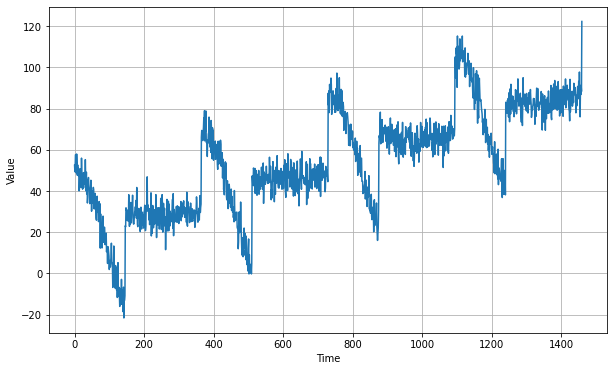

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

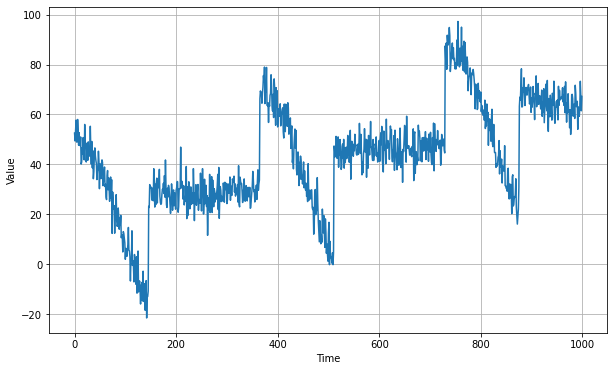

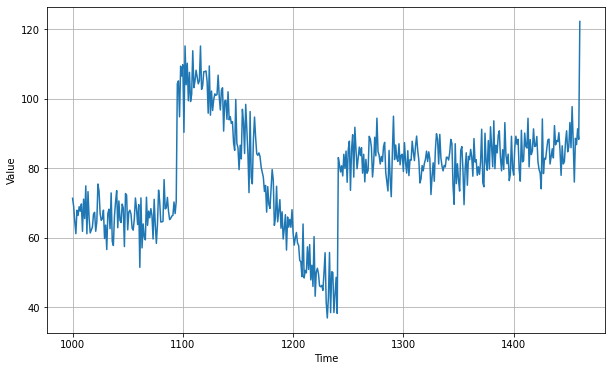

In [2]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize = (10,6))
plot_series(time_train, x_train)

plt.figure(figsize = (10,6))
plot_series(time_valid, x_valid)

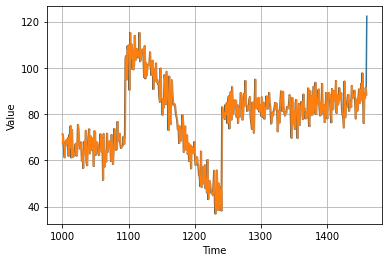

In [3]:
naive_forecast = series[split_time - 1:-1]

plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

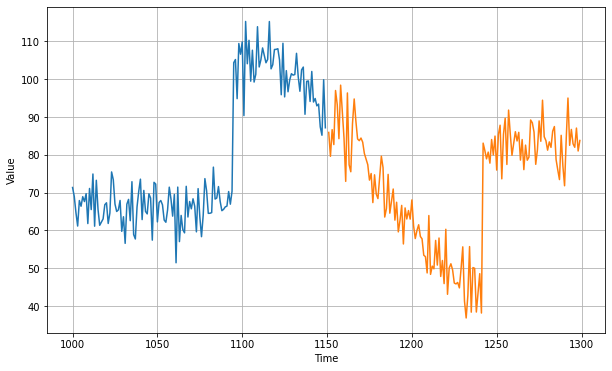

In [4]:
plt.figure(figsize = (10,6))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=151, end=300)

In [8]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827526
5.9379096


In [17]:
def moving_avg_forecast(series, window_size):
    forecast = []
    for index in range(window_size, len(series),1):
        forecast.append(series[index - window_size: index].mean())
    return forecast

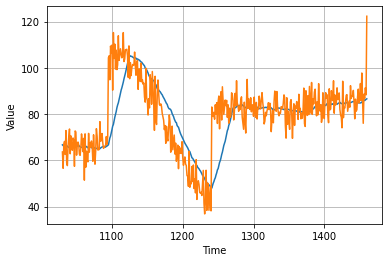

In [28]:
times_valid = time_valid[30:]
forecast = moving_avg_forecast(x_valid, 30)
plot_series(times_valid, forecast)
plot_series(times_valid, x_valid[30:])

In [31]:
print(keras.metrics.mean_squared_error(x_valid[30:],forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid[30:], forecast).numpy())

112.52482
7.367902


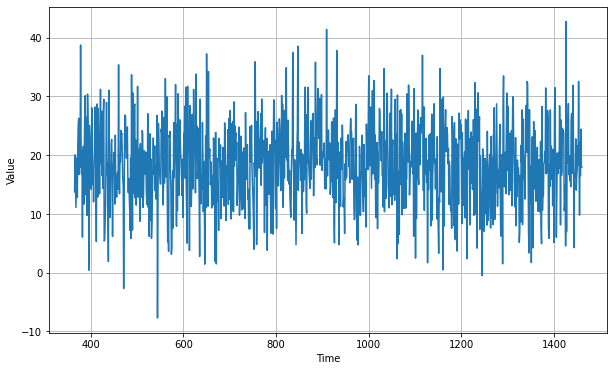

In [32]:
diff_series = series[365:] - series[:-365]
diff_time = time[365:]
plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

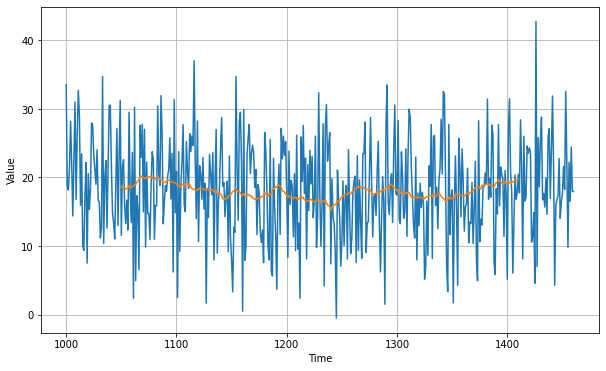

In [35]:
diff_moving_avg = moving_avg_forecast(diff_series, 50)[split_time - 365 + 50:]
plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid[50:411], diff_moving_avg)
plt.show()

In [37]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid[50:411], diff_moving_avg_plus_past)
plt.show()

ValueError: operands could not be broadcast together with shapes (461,) (361,) 

In [2]:
range(1000)[100:-1]

range(100, 999)

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
df.to_csv("~/Documents/CU Boulder Codes/Final Exam Codes/COVID_Time.csv")